In [1]:
import abc

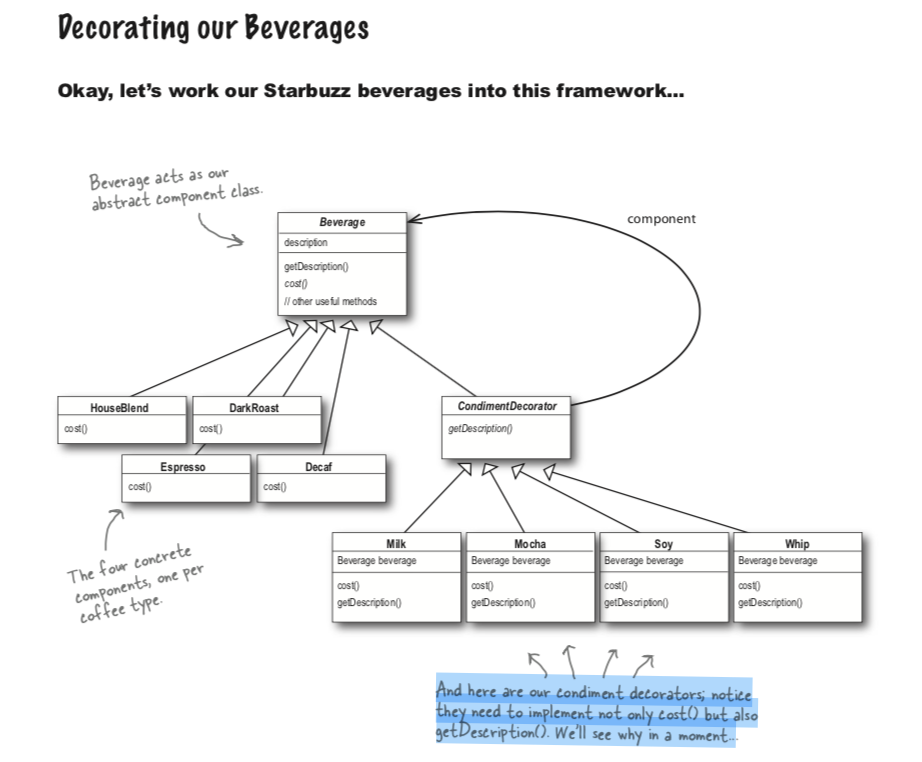

In [2]:
from IPython.display import Image
Image(filename='Decorator.png')

In [3]:
class Beverage():
    
    __meta__ = abc.ABCMeta
    
    def __init__(self, description, cost=0.0):
        self.description = description
        self.cost = cost
    
    def getDescription(self):
        return self.description
    
    def getCost(self):
        return self.cost

In [4]:
class CondimentDecorator(Beverage):
    __meta__ = abc.ABCMeta
    
    def __init__(self, description, cost=0.0):
        self.description = description
        self.cost = cost

#### The four concrete components, one per coffee type.

In [5]:
class Espresso(Beverage):
    
    def __init__(self):
        self.description = "Espresso"
    
    def getCost(self):
        return 1.99

class HouseBlend(Beverage):
    
    def __init__(self):
        self.description = "HouseBlend"
    
    def getCost(self):
        return 0.89

class DarkRoast(Beverage):
    
    def __init__(self):
        self.description = "DarkRoast"
    
    def getCost(self):
        return 0.89

class Decaf(Beverage):
    
    def __init__(self):
        self.description = "Decaf"
    
    def getCost(self):
        return 0.89

#### And here are our condiment decorators; notice they need to implement not only cost() but also getDescription(). We’ll see why in a moment..

In [6]:
class Milk(CondimentDecorator):
    
    def __init__(self, beverage):
        assert isinstance(beverage, Beverage), "Input's is not instance of Beverage"
        self.beverage = beverage
        
    def getDescription(self):
        return self.beverage.getDescription() + ', Milk'
    
    def getCost(self):
        return self.beverage.getCost() + .21

class Mocha(CondimentDecorator):
    
    def __init__(self, beverage):
        assert isinstance(beverage, Beverage), "Input's is not instance of Beverage"
        self.beverage = beverage
        
    def getDescription(self):
        return self.beverage.getDescription() + ', Mocha'
    
    def getCost(self):
        return self.beverage.getCost() + .22

class Soy(CondimentDecorator):
    
    def __init__(self, beverage):
        assert isinstance(beverage, Beverage), "Input's is not instance of Beverage"
        self.beverage = beverage
        
    def getDescription(self):
        return self.beverage.getDescription() + ', Soy'
    
    def getCost(self):
        return self.beverage.getCost() + .24
    
class Whip(CondimentDecorator):
    
    def __init__(self, beverage):
        assert isinstance(beverage, Beverage), "Input's is not instance of Beverage"
        self.beverage = beverage
        
    def getDescription(self):
        return self.beverage.getDescription() + ', Whip'
    
    def getCost(self):
        return self.beverage.getCost() + .18

## Application

In [7]:
beverage = Espresso()
'{} ${}'.format(beverage.getDescription(), beverage.getCost())

'Espresso $1.99'

In [8]:
# Dark Roast Coffee, Mocha, Mocha, Whip $1.49
beverage2 = DarkRoast()
beverage2 = Mocha(beverage2)
beverage2 = Mocha(beverage2)
beverage2 = Whip(beverage2)

'{} ${}'.format(beverage2.getDescription(), beverage2.getCost())

'DarkRoast, Mocha, Mocha, Whip $1.51'

In [9]:
beverage  = Whip(Mocha(Mocha(DarkRoast())))
'{} ${}'.format(beverage.getDescription(), beverage.getCost())

'DarkRoast, Mocha, Mocha, Whip $1.51'

In [10]:
beverage = Whip(Mocha(Soy(HouseBlend())))

'{} ${}'.format(beverage.getDescription(), beverage.getCost())

'HouseBlend, Soy, Mocha, Whip $1.53'